In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress

merged_personal_df = pd.read_csv("./Resources/merged_personal_df.csv")

# Seperating merged df by years
mp_df = {}
for year, Year in zip([2014, 2015, 2016, 2017, 2018], ["2014", "2015", "2016", "2017", "2018"]):
    mpdata = merged_personal_df.loc[(merged_personal_df["Year"] == year)]
    mp_df[Year] = mpdata

In [16]:
# def crime_v_hv(year):
#     x = mp_df[f"{year}"]["Median Home Value"]
#     y = mp_df[f"{year}"]["Crime Rate"]

#     plt.scatter(x, y, marker="o", facecolors="red", alpha=0.5, edgecolors="gray")
#     plt.title(f"Crime Rate vs Home Value {year}")
#     plt.xlabel("Home Value (USD)")
#     plt.ylabel("Crime Rate")

# Linear regression function:
def plot_linear_regression(x_axis, y_axis, x_label, y_label, titles, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-value is: {rvalue}")
    print(f"The p-value is: {pvalue}")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    regress_values = x_axis * slope + intercept
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    # plt.annotate(line_eq, coords, fontsize=15, color="red")
    plt.title(titles)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(filename)
    plt.show()

## Crime Rate vs. Median Home Value

The r-value is: -0.07548454705874298
The p-value is: 0.6062122614795267


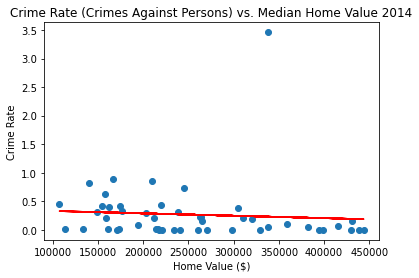

In [17]:
plot_linear_regression(mp_df["2014"]["Median Home Value"], mp_df["2014"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Crimes Against Persons) vs. Median Home Value 2014","./Images/cvh2014.png")

The r-value is: -0.06489780703501986
The p-value is: 0.65774785754497


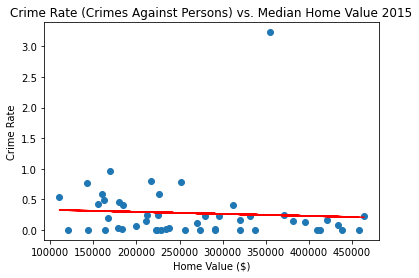

In [18]:
# crime_v_hv(2015)
plot_linear_regression(mp_df["2015"]["Median Home Value"], mp_df["2015"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Crimes Against Persons) vs. Median Home Value 2015", "./Images/cvh2015.png")

The r-value is: -0.0661307572085121
The p-value is: 0.6516582075441022


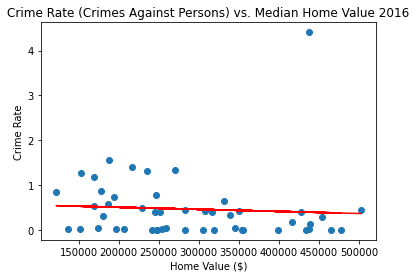

In [19]:
plot_linear_regression(mp_df["2016"]["Median Home Value"], mp_df["2016"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Crimes Against Persons) vs. Median Home Value 2016", "./Images/cvh2016.png")

The r-value is: 0.010148973621345182
The p-value is: 0.9448220188200153


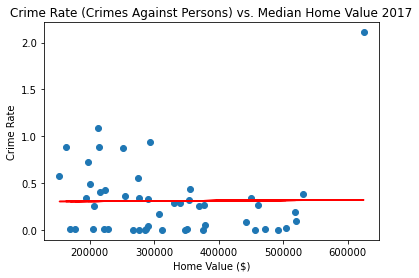

In [20]:
plot_linear_regression(mp_df["2017"]["Median Home Value"], mp_df["2017"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Crimes Against Persons) vs. Median Home Value 2017", "./Images/cvh2017.png")

The r-value is: 0.1584707853546729
The p-value is: 0.27679433697411227


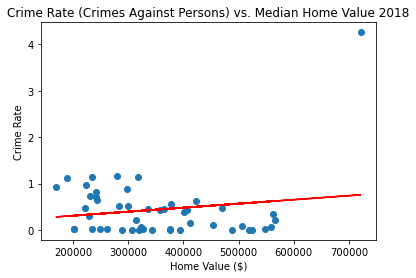

In [21]:
plot_linear_regression(mp_df["2018"]["Median Home Value"], mp_df["2018"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Crimes Against Persons) vs. Median Home Value 2018", "./Images/cvh2018.png")

## Crime Rate vs. Poverty Rate

The r-value is: -0.02539045331178989
The p-value is: 0.8625156216348929


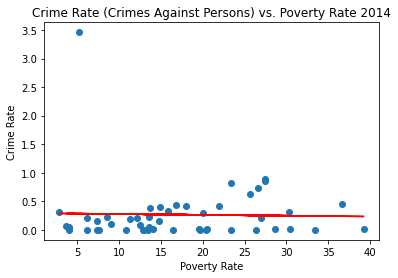

In [22]:
plot_linear_regression(mp_df["2014"]["Poverty Rate"], mp_df["2014"]["Crime Rate"], "Poverty Rate", "Crime Rate", "Crime Rate (Crimes Against Persons) vs. Poverty Rate 2014", "./Images/cvp2014.png")

The r-value is: -0.00918887504724902
The p-value is: 0.9500349331922693


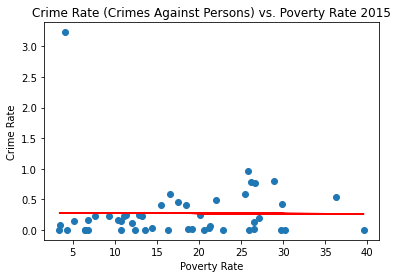

In [23]:
plot_linear_regression(mp_df["2015"]["Poverty Rate"], mp_df["2015"]["Crime Rate"], "Poverty Rate", "Crime Rate", "Crime Rate (Crimes Against Persons) vs. Poverty Rate 2015", "./Images/cvp2015.png")

The r-value is: 0.022865896072333775
The p-value is: 0.8760727857807289


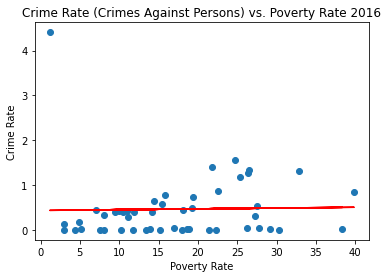

In [24]:
plot_linear_regression(mp_df["2016"]["Poverty Rate"], mp_df["2016"]["Crime Rate"], "Poverty Rate", "Crime Rate", "Crime Rate (Crimes Against Persons) vs. Poverty Rate 2016", "./Images/cvp2016.png")

The r-value is: 0.06418885246849568
The p-value is: 0.6612594579092024


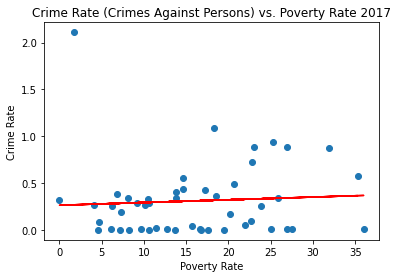

In [25]:
plot_linear_regression(mp_df["2017"]["Poverty Rate"], mp_df["2017"]["Crime Rate"], "Poverty Rate", "Crime Rate",  "Crime Rate (Crimes Against Persons) vs. Poverty Rate 2017", "./Images/cvp2017.png")

The r-value is: 0.16933079734060283
The p-value is: 0.2447731232997062


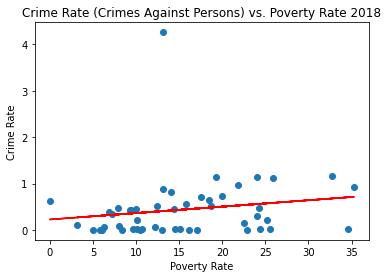

In [26]:
plot_linear_regression(mp_df["2018"]["Poverty Rate"], mp_df["2018"]["Crime Rate"], "Poverty Rate", "Crime Rate",  "Crime Rate (Crimes Against Persons) vs. Poverty Rate 2018", "./Images/cvp2018.png")

In [27]:
# convert crime count to crime rate
# crime rate vs home value
# crime rate vs poverty rate
# per year
# 10 graphs

In [28]:
# # Bar graph of crime rate vs home value 2014
# x = mp_df["2014"]["ZipCode"]
# y = mp_df["2014"]["Crime Rate"] * 1000000
# z = mp_df["2014"]["Median Home Value"]

# xpos = np.arange(len(x))

# plt.figure(figsize=(15, 5))
# plt.bar(xpos, y, align="center", label="Crime Rate")
# plt.bar(xpos, z, align="center", bottom=y, label="Home Value")
# plt.xticks(xpos, x, rotation=60)
# plt.title("crime rate vs home value 2014")
# plt.xlabel("ZipCodes")
# plt.legend()
# plt.show()